### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

### Open the data and create a data frame

In [3]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)

In [3]:
df.shape

(3291, 74)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3291 non-null   object 
 1   index                           3291 non-null   int64  
 2   period                          3291 non-null   int64  
 3   timestamp                       3291 non-null   object 
 4   minute                          3291 non-null   int64  
 5   second                          3291 non-null   int64  
 6   possession                      3291 non-null   int64  
 7   duration                        2457 non-null   float64
 8   match_id                        3291 non-null   int64  
 9   type_id                         3291 non-null   int64  
 10  type_name                       3291 non-null   object 
 11  possession_team_id              3291 non-null   int64  
 12  possession_team_name            32

In [5]:
df.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
0,e8643796-c76d-44f5-a03d-fa742e051942,1,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,937f83f8-674d-4c58-81d5-e2101a9f2e60,2,1,00:00:00,0,0,1,0.00000,69301,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87ba272a-3af0-4fc7-872f-65e8f79fb753,3,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85d30bef-8b77-405e-bc64-c63ed4d7a6d7,4,1,00:00:00,0,0,1,0.00000,69301,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140000,0,0,2,0.16873,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filter the data frame so only passes are left (and remove throw-ins)

In [6]:
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

In [7]:
passes.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,block_deflection,pass_cut_back,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140000,0,0,2,0.168730,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ecec23b8-f03d-4bee-80df-9fabec558187,9,1,00:00:05.143000,0,5,2,1.173625,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bdedb943-ddac-42ab-bc8b-756faa49d9e6,12,1,00:00:07.844000,0,7,2,1.019100,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456a1ae6-1fe8-4ffc-952b-152a7f89e1d2,15,1,00:00:10.586000,0,10,2,0.700000,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a8d0155f-260c-4470-b842-b474ea58ffa7,19,1,00:00:11.326000,0,11,2,4.150000,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Iterative solution pass match without using the MPL soccer library

1. Draw the pitch
2. Next, iterate through the passes. Check if a pass was made by Lucy Bronze. 
3. If so, take the starting coordinates of a pass and plot a circle. 
4. Then, subtract the coordinates at beginning of the pass from the end of passes in order to draw pass arrows.

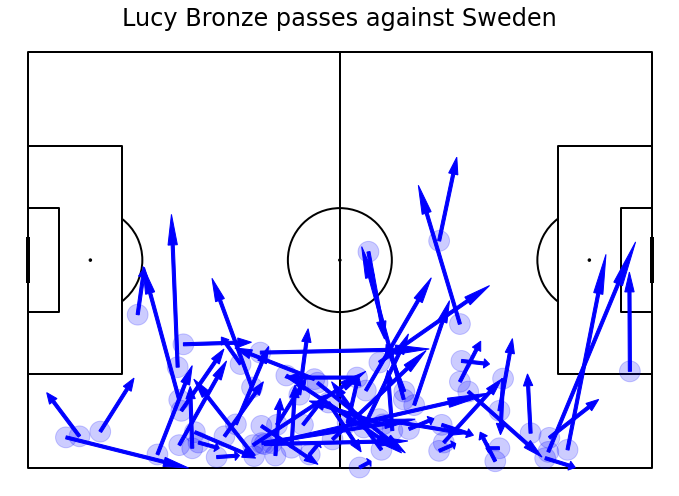

In [8]:
# Draw the pitch!
pitch = Pitch(line_color='black')
fig, ax = pitch.draw(figsize=(10,7))

#start the loop over the passes DF, iterating through each row
for i, thepass in passes.iterrows():
    if thepass['player_name'] == 'Lucy Bronze':
        x = thepass['x']
        y = thepass['y']
        #plot the circle
        passCircle=plt.Circle((x,y), 2, color='blue')
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot the arrows
        passArrow = plt.Arrow(x,y,dx,dy, width=3, color='blue')
        ax.add_patch(passArrow)


fig.set_size_inches(10,7)
ax.set_title('Lucy Bronze passes against Sweden', fontsize=24)
plt.show()

### Create the pass map using MPL soccer functions

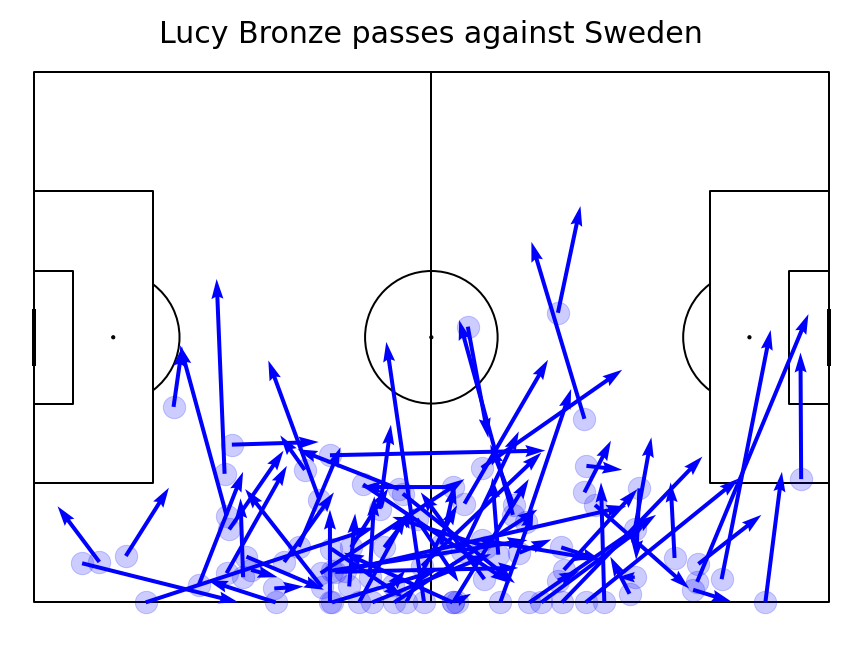

In [9]:
mask_bronze = (df.type_name == 'Pass') & (df.player_name == "Lucy Bronze")
df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Lucy Bronze passes against Sweden", fontsize = 30)
plt.show()

### Plotting multiple pass maps in one visualization

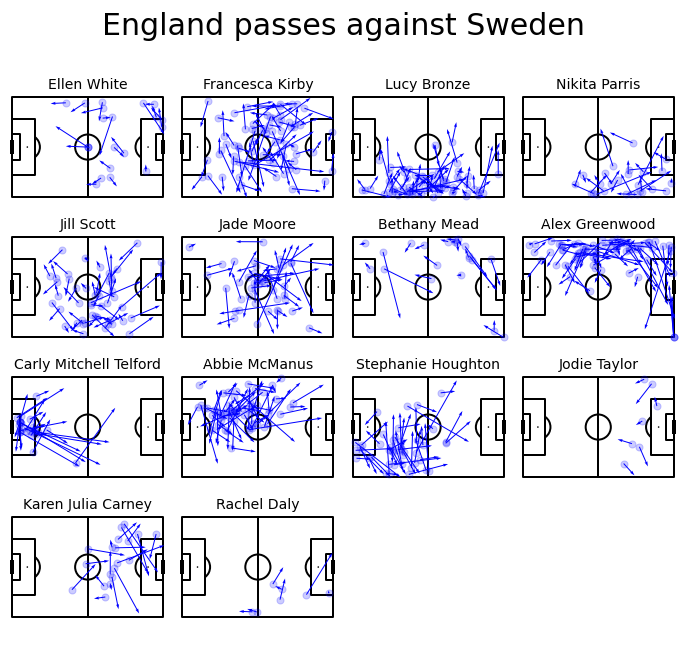

In [12]:
#prepare the dataframe of passes by England that were no-throw ins
mask_england = (df.type_name == 'Pass') & (df.team_name == "England Women's") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', 'player_name']]
#get the list of all players who made a pass
names = df_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'England passes against Sweden', ha='center', va='center', fontsize=30)
plt.show()

In [11]:
#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'England passes against Sweden', ha='center', va='center', fontsize=30)
plt.show()